In [5]:
import pandas as pd

df = pd.read_csv("../../../../data/preprocessed_data.csv")

Separate between objective and independent variables

In [6]:
x = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

Divide the data between train and test data

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2)

Implementing Random Forest, KNN and Logistic Regresion


Random Forest Feature Selection:


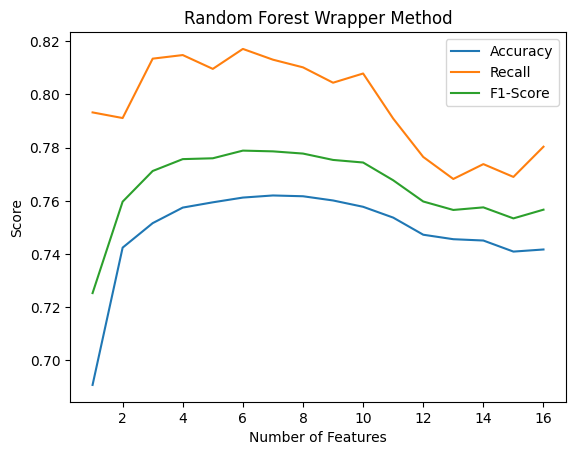


KNN Feature Selection:


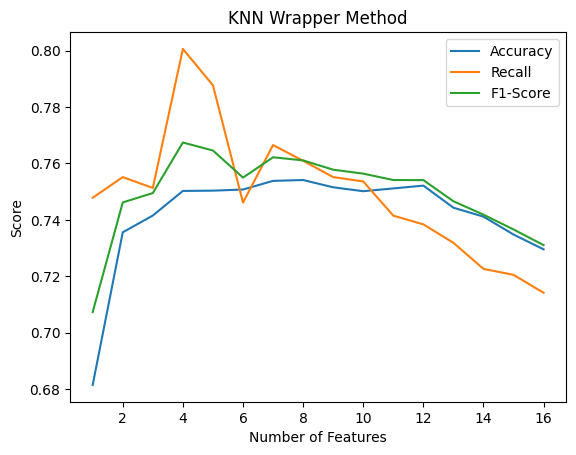


Logistic Regression Feature Selection:


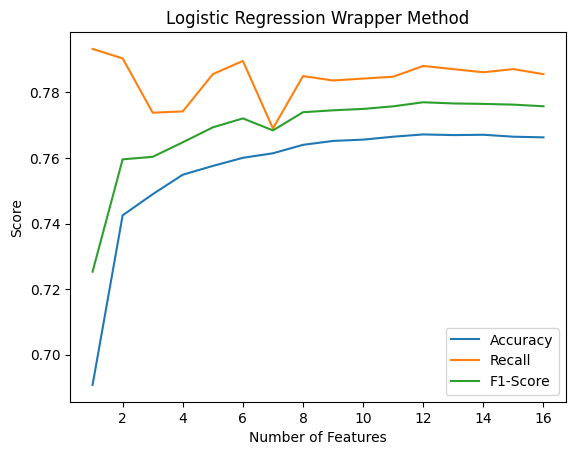

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score
import numpy as np

# Define your models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=12),
    'Logistic Regression': LogisticRegression(max_iter=500, random_state=42)
}

# Evaluate the features chosen
def evaluate_model(model, features):
    model.fit(x_train.iloc[:, features], y_train)
    predictions = model.predict(x_test.iloc[:, features])
    accuracy = accuracy_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    return accuracy, recall, f1

selected_models = []
# Wrapper method
for model_name, model in models.items():
    print(f"\n{model_name} Feature Selection:")
    selected_features = []
    accuracy_list = []
    recall_list = []
    f1_list = []

    while len(selected_features) < x_train.shape[1]:
        best_accuracy = 0
        best_recall = 0
        best_f1 = 0
        best_feature = None

        for feature_index in range(x_train.shape[1]):
            if feature_index not in selected_features:
                current_features = selected_features + [feature_index]
                accuracy, recall, f1 = evaluate_model(model, current_features)

                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_recall = recall
                    best_f1 = f1
                    best_feature = feature_index

        selected_features.append(best_feature)
        accuracy_list.append(best_accuracy)
        recall_list.append(best_recall)
        f1_list.append(best_f1)

    # Plot the results
    import matplotlib.pyplot as plt

    plt.plot(np.arange(1, x_train.shape[1] + 1), accuracy_list, label='Accuracy')
    plt.plot(np.arange(1, x_train.shape[1] + 1), recall_list, label='Recall')
    plt.plot(np.arange(1, x_train.shape[1] + 1), f1_list, label='F1-Score')
    plt.xlabel('Number of Features')
    plt.ylabel('Score')
    plt.title(f'{model_name} Wrapper Method')
    plt.legend()
    plt.show()

    # Append the model with unique name
    selected_models.append((f'{model_name} - {len(selected_models)}', model, selected_features))

Bagging

c:\Users\pablo\OneDrive\Documentos\GitHub\Probabilistic-Heart-Disease-Prediction\venv\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging Classifier Metrics:
Accuracy: 0.76570239746384
Recall: 0.7859480269489895
F1 Score: 0.775424935903523


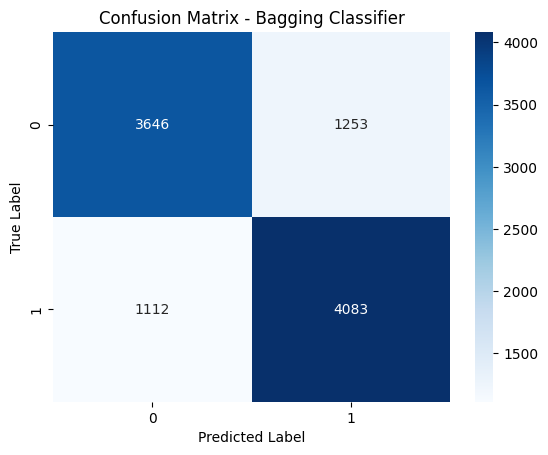

In [9]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create a BaggingClassifier
estimators = [(name, model) for name, model, _ in selected_models]

bagging_model = BaggingClassifier(base_estimator=LogisticRegression(max_iter=1000),
                                  n_estimators=len(estimators),
                                  random_state=42)

# Fit the BaggingClassifier on the training data
bagging_model.fit(x_train, y_train)

# Make predictions for the test data
y_pred_bagging = bagging_model.predict(x_test)

# Calculate evaluation metrics for bagging
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
recall_bagging = recall_score(y_test, y_pred_bagging)
f1_bagging = f1_score(y_test, y_pred_bagging)
conf_matrix_bagging = confusion_matrix(y_test, y_pred_bagging)

# Print the metrics for bagging
print("Bagging Classifier Metrics:")
print("Accuracy:", accuracy_bagging)
print("Recall:", recall_bagging)
print("F1 Score:", f1_bagging)

# Plot the confusion matrix
sns.heatmap(conf_matrix_bagging, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Bagging Classifier")
plt.show()